In [1]:
# Import des paquets requis
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})

In [2]:
# Lecture des données du fichier CSV (roulez le script pour imu et odom)
df = pd.read_csv("encoders_data.csv") 

# Affiche les 5 premières lignes du fichier 
df.head()

,vg,vd,vg_gt,vd_gt
0,0.013193,-0.030017,0.0,0.0
1,0.031466,-0.050756,0.0,0.0
2,-0.027442,0.058055,0.0,0.0
3,0.041751,-0.043170,0.0,0.0
4,0.014340,0.011968,0.0,0.0


In [3]:
# Réparti les données en lectures des capteurs et référence (ground_truth)
n, d = df.shape
data = df.iloc[:,:int(d/2)].values
ground_truth = df.iloc[:,int(d/2):].values

In [4]:
#Liste pour le stockage des résultats 
list_vg = []
list_vd = []
variance = []
mean = []

#On tri les résultats par liste
for i in range(0, len(data)):
    list_vg.append(data[i][0])
    list_vd.append(data[i][1])
    
# ------------- Vg-------------------------
variance_vg = np.var(list_vg)
mean_vg = np.mean(list_vg)

variance.append(variance_vg)
mean.append(mean_vg)

print("Variance pour la vitesse de la roue gauche : \033[31m{:.6f}\033[0m".format(variance_vg))
print(f"Variance pour la vitesse de la roue gauche  : {variance_vg}")
print("Moyenne pour la vitesse de la roue gauche : \033[31m{:.6f}\033[0m\n".format(mean_vg))

# ------------- Vd-------------------------
variance_vd = np.var(list_vd)
mean_vd = np.mean(list_vd)

variance.append(variance_vd)
mean.append(mean_vd)

print("Variance pour vitesse de la roue droite : \033[31m{:.6f}\033[0m".format(variance_vd))
print(f"Variance pour la vitesse de la roue droite  : {variance_vd}")
print("Moyenne pour vitesse de la roue droite : \033[31m{:.6f}\033[0m\n".format(mean_vd))


Variance pour la vitesse de la roue gauche : 0.002072
Variance pour la vitesse de la roue gauche  : 0.00207188799341715
Moyenne pour la vitesse de la roue gauche : 0.001283

Variance pour vitesse de la roue droite : 0.001964
Variance pour la vitesse de la roue droite  : 0.0019638318193607386
Moyenne pour vitesse de la roue droite : -0.000428



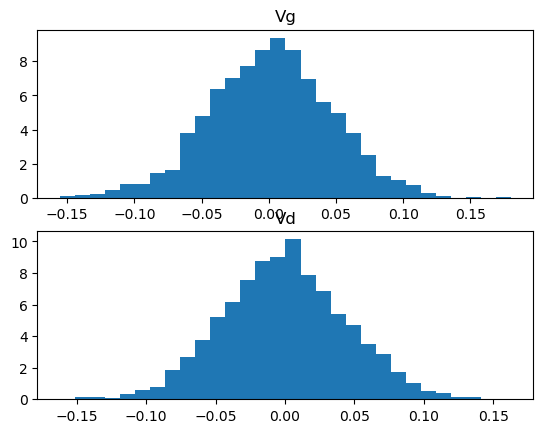

In [17]:
# Affiche les histogrammes des données
fig, ax = plt.subplots(2,1)
# cpt_plot_x = 0
# cpt_plot_y = 0
color_graph = ["r"]*4

# For heading 
for i in range(int(d/2)):
    
    # For subplot display
    if i == 0:
        ax[0].set_title("Vg")
        color_graph[0] = "r"
        count, bins, ignored =  ax[0].hist(data[:,i], 30, density=True)
    if i == 1:
        ax[1].set_title("Vd")
        color_graph[1] = "b"
        count, bins, ignored =  ax[1].hist(data[:,i], 30, density=True)
        
    
    
    #Probleme avec cette ligne 
    #ax[i//2][i%2].plot(bins, 1/(variance[i] * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean[i])**2 / (2 * variance[i]**2) ),
    #         linewidth=2, color=color_graph[i])
plt.show()

